In [1]:

# Git clone and run tests on updates branch
!git clone https://github.com/ultralytics/ultralytics -b main
%pip install -qe ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 31569, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 31569 (delta 158), reused 198 (delta 142), pack-reused 31329
Receiving objects: 100% (31569/31569), 15.61 MiB | 17.92 MiB/s, done.
Resolving deltas: 100% (22881/22881), done.
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 60.1 MB/s eta 0:00:00
  Building editable for ultralytics (pyproject.toml) ... done


In [2]:
# Train YOLOv8n on COCO8 for 3 epochs
!yolo train model=yolov8n.pt data=coco8.yaml epochs=3 imgsz=640

100% 6.25M/6.25M [00:00<00:00, 127MB/s]
Ultralytics YOLOv8.2.67 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [4]:
# Run inference on an image with YOLOv8n
!yolo predict model=ultralytics/runs/detect/train/weights/last.pt source='datasets/coco8/images/val/000000000049.jpg'

Ultralytics YOLOv8.2.67 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/datasets/coco8/images/val/000000000049.jpg: 640x512 5 persons, 2 horses, 1 potted plant, 111.2ms
Speed: 4.2ms preprocess, 111.2ms inference, 892.7ms postprocess per image at shape (1, 3, 640, 512)
Results saved to /content/ultralytics/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [5]:
!pip install matplotlib

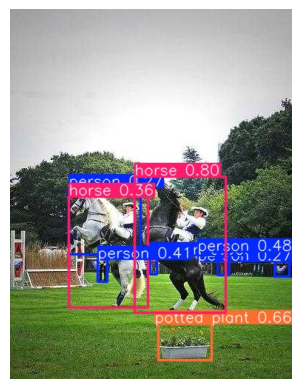

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/ultralytics/runs/detect/predict/000000000049.jpg') #Replace "image.jpg" with the path of your image
plt.imshow(img)
plt.axis('off')
plt.show()